In [1]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import json
import pandas as pd
import datetime as dt
import plotly

In [2]:
# select json to generate data from
data = "test_combined.json"

In [3]:
def create_df_all_models(data):

    with open(data) as f:
        data = json.load(f)
    


    #f = open("demofile.txt", "r")
    # generate variables to be added to the df
    vidlength = data['videoInfo']['videoLength']
    unique_keys = set([_key for key,val in data['seconds'].items() for _key, _val in val.items()])
    df = pd.DataFrame({'seconds': range(0, vidlength +1)})
    df['seconds'] = pd.to_datetime(df["seconds"], unit='s').dt.strftime('%H:%M:%S')

    #add placeholder values
    for unique_key in unique_keys:
        df[unique_key] = 0

    #impute real values in their corresponding seconds
    for second, vals in data['seconds'].items():
        for _key, _val in vals.items():

            df.at[int(second), _key] = _val
    df['seconds'] = pd.to_datetime(df['seconds'])

    # rename columns and clean names
    df.columns = map(str.title, df.columns)
    df.columns = df.columns.str.replace("_", " ")
    df = df.rename(columns={"Officer": "Uniformed Person", "Civilian": "Non-Uniformed Person"})
    # reorder columns
    #df = df[['seconds', 'Officer', 'Civilian', 'Chemical Smoke', 'Riot Shield', 'Baton', '']]
    print(df.columns)
    return df

df = create_df_all_models(data)

color_map = {'Brawling':'red', 'Restraining':'red', 'Striking':'red','Throwing': 'red', 'Brawling':'red', 'Running':'yellow', 'Chemical Smoke':'green', 'Crowd':'yellow',
       'Baton':'green', 'Riot Shield':'green', 'Non-Uniformed Person':'purple', 'Uniformed Person':'purple',
       'Person On Ground':'yellow', 'Spray':'red', 'Gun':'red', 'Pepper Spray':'green'}

Index(['Seconds', 'Spray', 'Baton', 'Throwing', 'Brawling', 'Crowd',
       'Person On Ground', 'Riot Shield', 'Uniformed Person',
       'Non-Uniformed Person', 'Running', 'Chemical Smoke'],
      dtype='object')


In [8]:
df

,Seconds,Riot Shield,Running,Chemical Smoke,Non-Uniformed Person,Brawling,Uniformed Person,Baton,Throwing,Person On Ground,Crowd,Spray
0,2022-06-11 00:00:00,0,0,0,0,0,0,0,0,0,0,0
1,2022-06-11 00:00:01,0,0,0,9,0,4,0,1,0,0,0
2,2022-06-11 00:00:02,0,0,0,2,0,0,0,1,0,0,0
3,2022-06-11 00:00:03,0,0,0,7,0,0,0,1,0,0,0
4,2022-06-11 00:00:04,0,0,0,6,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136,2022-06-11 00:02:16,0,0,0,0,0,5,0,0,0,0,0
137,2022-06-11 00:02:17,0,0,0,3,0,5,0,0,0,0,0
138,2022-06-11 00:02:18,1,0,0,6,0,4,0,0,0,0,0
139,2022-06-11 00:02:19,0,0,0,4,0,5,0,0,0,0,0


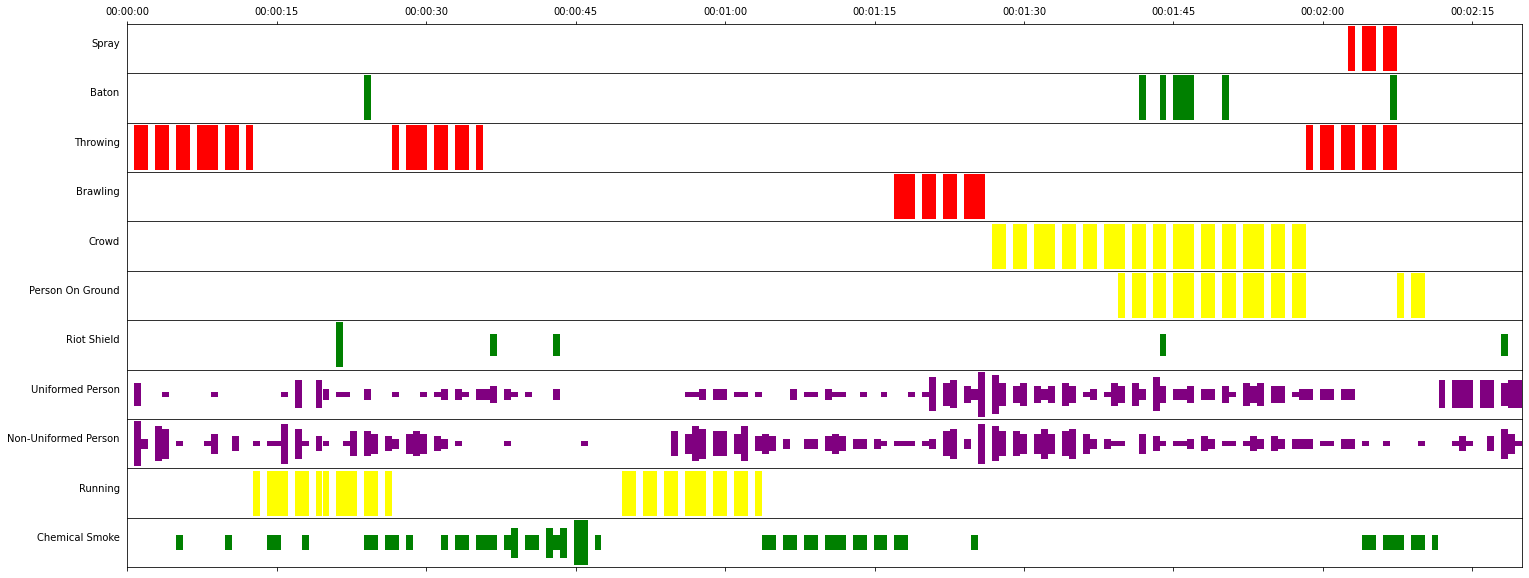

In [15]:
# matplotlib
import matplotlib.pyplot as plt
from mpl_interactions import ioff, panhandler, zoom_factory

df_col_names = list(df.columns[1:])

fig, axs = plt.subplots(len(df.columns)- 1, 1, figsize=(25,10))

for ind, ax in enumerate(axs):
    #color
    col_name = df.columns[ind + 1]


    ax.hist(x=df['Seconds'],bins=200, weights=df[df_col_names[ind]], color=color_map[col_name])
    ax.hist(x=df['Seconds'],bins=200, weights=df[df_col_names[ind]] * -1, color=color_map[col_name])
    ax.set_ylabel(df_col_names[ind], rotation=0, ha='right')

    ax.margins(x=0)
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticks([])
    if ind == 0:
        ax.xaxis.tick_top()
    else:
        ax.axes.xaxis.set_ticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)

disconnect_zoom = zoom_factory(ax)
pan_handler = panhandler(fig)

#plt.show()


In [53]:
# fig 2 with histogram
#keep track of detection colors
bins = 200

#detection_colors = {'Officer': 'blue', 'Civilian': 'blue', 'Baton': 'green', 'Gun':'green', 'Riot Shield': 'green', 'Chemical Smoke': 'red', 'Pepper Spray': 'red'}

x = df['seconds']
y = df['Officer']

fig = make_subplots(
    rows=len(df.columns)-1, 
    cols=1,
    shared_xaxes=True,
    subplot_titles=df.columns[1:],
    vertical_spacing=0,
    column_widths=[1],
    
    )

# add the bars into the graph
for i, val in enumerate(df.columns):
    if val == 'seconds':
        continue
    fig.add_trace(
        go.Histogram(
        x=df['seconds'],
        y=df[val],
        histfunc='sum',
        marker=dict(color='blue'),
        #marker=dict(color=detection_colors[val]),
        nbinsx=bins
    ),row=i, col=1),
    # add negative of same values to flip the bars on the same graph
    fig.add_trace(
        go.Histogram(
        x=df['seconds'],
        y=df[val] * -1,
        histfunc='sum',
        nbinsx=bins,
        marker=dict(color='blue')
        #marker=dict(color=detection_colors[val]),
        
    ),row=i, col=1)

fig.update_layout(
    showlegend=False,
    height = 400,
    width = 1500,
    barmode='relative',
    bargap=0,
    bargroupgap=0,
    margin=dict(
    l=150,
    r=10,
    b=20,
    t=30,
    pad=0
    ),
    )

for i in range(1, len(df.columns)):
    fig.update_yaxes(
    row=i, col=1, side='left', showticklabels=False, showgrid=False, linewidth=1, linecolor='black', mirror=True,)

    if i == 1:
        fig.update_xaxes(row=i, col=1, side='top',linewidth=1, linecolor='gray', mirror=True,showticklabels=True, nticks=12)
    else:
        fig.update_xaxes(row=i, col=1, showticklabels=False, linewidth=1, linecolor='gray', mirror=True)

for i in range(0, len(df.columns[1:])):
    fig.layout.annotations[i].update(x=-0.06)
    fig.layout.annotations[i]['y'] = fig.layout.annotations[i]['y'] - 0.08

fig.show()